In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/anaconda/envs/3point6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [5]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,8 years,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [7]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [9]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.97929282,  0.98059889,  0.98109758,  0.98162   ,  0.97508905,
        0.97720256,  0.96777411,  0.98052673,  0.97988458,  0.98038284])

In [10]:
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
rfc.decision_path(X.iloc[0,:].values.reshape(1,-1))

(<1x213164 sparse matrix of type '<class 'numpy.int64'>'
 	with 248 stored elements in Compressed Sparse Row format>,
 array([     0,  21623,  42528,  62647,  83946, 106413, 126876, 148395,
        169352, 191057, 213164]))

In [12]:
from sklearn import tree

i_tree = 0
for tree_in_forest in rfc.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [13]:
xcorr = X.corr()

In [14]:
import seaborn as sns

In [ ]:
# looking at correlation structure seems useless because of the number of variables
# PCA is not really a good idea because PCA will not align with the features I have (???)

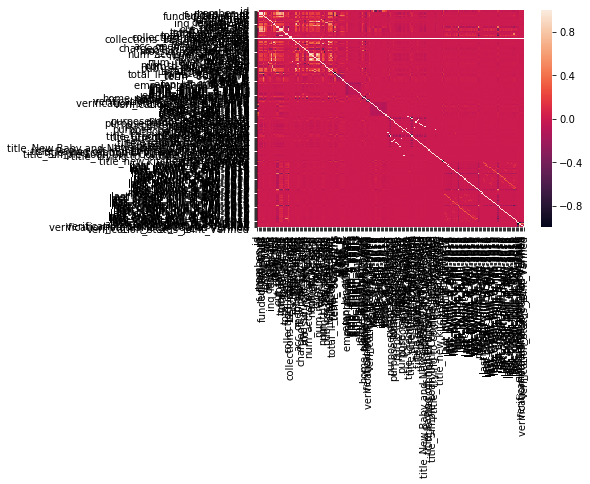

In [15]:
sns.heatmap(xcorr, 
        xticklabels=xcorr.columns,
        yticklabels=xcorr.columns)

In [16]:
tree1 = rfc.estimators_[0]

In [17]:
import matplotlib.pyplot as plt

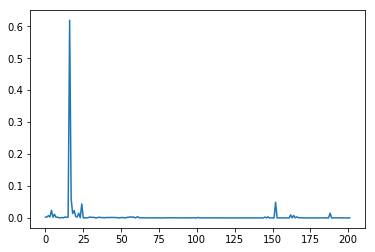

In [18]:
plt.plot(tree1.feature_importances_)

In [19]:
impIdx = np.where(tree1.feature_importances_>0.05)

In [20]:
impIdx = []
for tree in rfc.estimators_:
    impIdx.extend(np.where(tree.feature_importances_>0.05)[0].tolist())

In [21]:
idxu = np.unique(impIdx, return_counts=True)

In [22]:
for ii in range(0, len(idxu[0]) ):
    print('feature {} appears {}'.format(idxu[0][ii],idxu[1][ii]))

feature 15 appears 6
feature 16 appears 4
feature 17 appears 2
feature 18 appears 1
feature 19 appears 3
feature 22 appears 1
feature 23 appears 1
feature 24 appears 5
feature 147 appears 1
feature 152 appears 1
feature 167 appears 2
feature 168 appears 1
feature 182 appears 3
feature 194 appears 1


In [23]:
sortedIndices = np.argsort(idxu[1])

In [24]:
featIdxDesc = idxu[0][sortedIndices[::-1]]

In [25]:
featIdxDesc

array([ 15,  24,  16, 182,  19, 167,  17, 194, 168, 152, 147,  23,  22,  18])

In [26]:
# set up a random forest where you use only increasing numbers of features and see how the cross validation score evolves
rfcNew = ensemble.RandomForestClassifier()

In [27]:
cv_scores = []
for ii in range(0, len(featIdxDesc)):
    considerIdx = featIdxDesc[0:ii+1]
    print('features used:')
    print(considerIdx)
    XX = X.iloc[:,considerIdx]
    cv_scores.append(cross_val_score(rfcNew, XX, Y, cv=10))

features used:
[15]
features used:
[15 24]
features used:
[15 24 16]
features used:
[ 15  24  16 182]
features used:
[ 15  24  16 182  19]
features used:
[ 15  24  16 182  19 167]
features used:
[ 15  24  16 182  19 167  17]
features used:
[ 15  24  16 182  19 167  17 194]
features used:
[ 15  24  16 182  19 167  17 194 168]
features used:
[ 15  24  16 182  19 167  17 194 168 152]
features used:
[ 15  24  16 182  19 167  17 194 168 152 147]
features used:
[ 15  24  16 182  19 167  17 194 168 152 147  23]
features used:
[ 15  24  16 182  19 167  17 194 168 152 147  23  22]
features used:
[ 15  24  16 182  19 167  17 194 168 152 147  23  22  18]


In [28]:
cv_scores

[array([ 0.84540856,  0.86207879,  0.84267769,  0.87326352,  0.87164569,
         0.86551888,  0.84530623,  0.85487663,  0.85933455,  0.84926139]),
 array([ 0.86894161,  0.93498136,  0.90805253,  0.94281779,  0.93987176,
         0.93364996,  0.91196656,  0.92438671,  0.93799131,  0.93870232]),
 array([ 0.87604189,  0.93372278,  0.91223196,  0.94217663,  0.94101164,
         0.9355735 ,  0.91239403,  0.92602532,  0.93837129,  0.93981855]),
 array([ 0.86958277,  0.93453017,  0.91515281,  0.94193916,  0.93996675,
         0.93495607,  0.91163409,  0.92771142,  0.93290902,  0.93542488]),
 array([ 0.82213673,  0.95371756,  0.92759612,  0.95376505,  0.95084303,
         0.94583234,  0.91904343,  0.93664062,  0.94848837,  0.95561203]),
 array([ 0.86998646,  0.95001306,  0.93704733,  0.95162784,  0.94398005,
         0.94495369,  0.91199031,  0.93930039,  0.94133992,  0.95518453]),
 array([ 0.82208924,  0.95423998,  0.94239035,  0.95122415,  0.94039421,
         0.94072667,  0.90315609,  0.93

In [29]:
for ii in range(0, len(cv_scores)):
    print( np.mean(cv_scores[ii]))

0.856937192599
0.924136191744
0.925736757621
0.924380713767
0.93136752881
0.934542358998
0.928764741141
0.930025697154
0.930032848649
0.936073986396
0.971676283999
0.97192324877
0.971426932989
0.971533791963


In [30]:
X.iloc[:,featIdxDesc].head()

,out_prncp,last_pymnt_amnt,out_prncp_inv,last_credit_pull_d_Jan-2017,total_rec_prncp,next_pymnt_d_Feb-2017,total_pymnt,last_credit_pull_d_Oct-2016,next_pymnt_d_Jan-2017,last_pymnt_d_Jan-2017,last_pymnt_d_Dec-2016,collection_recovery_fee,recoveries,total_pymnt_inv
0,13668.88,379.39,13668.88,1,2331.12,0,4519.68,0,1,1,0,0.0,0.0,4519.68
1,6635.69,298.58,6635.69,1,2964.31,0,3572.97,0,1,1,0,0.0,0.0,3572.97
2,0.00,20807.39,0.00,1,25000.00,0,26224.23,0,0,0,0,0.0,0.0,26224.23
3,19263.77,858.05,19263.77,1,8736.23,0,10271.36,0,1,1,0,0.0,0.0,10271.36
4,0.00,8251.42,0.00,0,8650.00,0,9190.49,0,0,0,0,0.0,0.0,9190.49


# set up simple decision tree based on a few of the above features

In [31]:
import time
from sklearn.tree import DecisionTreeClassifier

In [32]:
decTreeStartTime = time.time()
clf = DecisionTreeClassifier(random_state=0)
print('cross validation score {}'.format(cross_val_score(clf, X.iloc[:,featIdxDesc[0:5]], Y, cv=10)))
print('that took %s seconds'% (time.time()-decTreeStartTime))

cross validation score [ 0.79254827  0.92750113  0.90826625  0.93790221  0.93296129  0.92085015
  0.88850365  0.89510556  0.91200988  0.9398423 ]
that took 139.9488980770111 seconds


# set up random forest based on the same features

In [33]:
randForStartTime = time.time()
rfcNewNew = ensemble.RandomForestClassifier()
print('cross validation score {}'.format(cross_val_score(rfcNewNew, X.iloc[:,featIdxDesc[0:5]], Y, cv=10)))
print('that took %s seconds'% (time.time()-randForStartTime))

cross validation score [ 0.82256418  0.9519128   0.9266225   0.95359882  0.95048682  0.94433626
  0.91930466  0.93666437  0.94397606  0.95565953]
that took 300.4327702522278 seconds
